**Вариант 2**

## Списки

Вам дан список. Поменяйте местами первую и вторую половину списка.

In [92]:
lst = [1, 2, 3, 4, 5, 6]

In [87]:
for i in range(len(lst) // 2):
    lst[i], lst[len(lst) // 2 + i] = lst[len(lst) // 2 + i], lst[i]
print(lst)

[4, 5, 6, 1, 2, 3]


In [89]:
import time

In [90]:
start_time = time.time()

for _ in range(1_000_000):
  lst = [1, 2, 3, 4, 5, 6]
  for i in range(len(lst) // 2):
    lst[i], lst[len(lst) // 2 + i] = lst[len(lst) // 2 + i], lst[i]

end_time = time.time()

print(f"Время выполнения 1_000_000 повторов: {end_time - start_time:.4f} секунд")

Время выполнения 1_000_000 повторов: 1.4680 секунд


In [91]:
start_time = time.time()

for _ in range(1_000_000):
  lst = [1, 2, 3, 4, 5, 6]
  n = len(lst) // 2
  lst = lst[n:] + lst[:n]

end_time = time.time()

print(f"Время выполнения 1_000_000 повторов: {end_time - start_time:.4f} секунд")

Время выполнения 1_000_000 повторов: 0.5107 секунд


In [93]:
n = len(lst) // 2
lst = lst[n:] + lst[:n]
print(lst)

[4, 5, 6, 1, 2, 3]


Вам дан список. Поменяйте в нём местами блоки элементов: каждый нечётный со первого по пятый с начала с каждым чётный со второго по шестой с конца.

In [81]:
lst = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [82]:
print(f'odd: {lst[1:5+1:2]}')
print(f'even: {lst[-2:-6-1:-2]}')

odd: [1, 3, 5]
even: [8, 6, 4]


In [83]:
odd_block = lst[1:5+1:2]
even_block = lst[-2:-6-1:-2]

lst[1:5+1:2], lst[-2:-6-1:-2] = even_block, odd_block
print(lst)

[0, 8, 2, 6, 5, 4, 3, 7, 1, 9]


## Генераторы

Вам дан список. Создайте новый список, в котором останутся только чётные элементы кратные трём.

In [15]:
lst = [1, 2, 3, 6, 9, 12, 15, 18]

In [95]:
res = [lst[i] for i in range(len(lst)) if i % 2 == 0 and lst[i] % 3 == 0]
print(res)

[6]


In [16]:
res = [x for x in lst if x % 2 == 0 and x % 3 == 0]
print(res)

[6, 12, 18]


Вам дан список. Для него и ивертированного по порядку списка выведите пары (x, y) в новом списке.

In [17]:
lst = [1, 2, 3, 4, 5]

In [18]:
res = [(x, y) for x, y in zip(lst, lst[::-1])]
print(res)

[(1, 5), (2, 4), (3, 3), (4, 2), (5, 1)]


## Встроенные функции

Вам дана строка. Выведите сумму ascii-кодов элементов в строке.

In [20]:
s = "Hello Egorov!"
print(sum(map(ord, s)))

1191


Вам дана строка. Выведите строку, выведите пары (элемент строки, порядковый номер).

In [21]:
s = "Hello Egorov!"
res = list(enumerate(s, start=1))
print(res)

[(1, 'H'), (2, 'e'), (3, 'l'), (4, 'l'), (5, 'o'), (6, ' '), (7, 'E'), (8, 'g'), (9, 'o'), (10, 'r'), (11, 'o'), (12, 'v'), (13, '!')]


## NumPy

In [22]:
import numpy as np

Дан массив 16х16
Создайте новый массив 4х4 , элементы которого будут суммой блоков 4х4 исходного массива

In [26]:
arr = np.arange(16*16).reshape(16, 16)
res = np.zeros((4, 4), dtype=int)

for i in range(4):
    for j in range(4):
        res[i, j] = arr[i*4:(i+1)*4, j*4:(j+1)*4].sum()

print(res.shape)
print(res)

(4, 4)
[[ 408  472  536  600]
 [1432 1496 1560 1624]
 [2456 2520 2584 2648]
 [3480 3544 3608 3672]]


Дан массив, вставьте между каждым значением сумму соседних элементов

In [27]:
arr = np.array([1, 2, 3, 4, 5])

sums = arr[:-1] + arr[1:]

res = np.empty(arr.size + sums.size, dtype=arr.dtype)
res[0::2] = arr
res[1::2] = sums

print(res)

[1 3 2 5 3 7 4 9 5]


## Pandas

https://www.kaggle.com/datasets/ishadss/productivity-prediction-of-garment-employees

- Какие типы данных присутствуют в датасете?
- Есть ли в датасете пропущенные значения? Если да, то сколько и где?
- Постройте график распределения переменной `actual_productivity`.
- Постройте heatmap для матрицы корреляции числовых переменных в датасете.
- Постройте pairplot для всех переменных.
- Постройте boxplot для всех переменных и выведете объекты которые являются выбросами (строки из датафрейма).
- Посчитайте различные статестические показатели (среднее, медиана, максимум, минимум) для различных категорий в колонке `quarter` *(т.е. отдельно какие показатели у класса quarter1, какие у класса quarter2 и и т.д.)*.
- Разделите колонку `date` на три: день, месяц, год.

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
df = pd.read_csv('/content/garments_worker_productivity.csv')

In [32]:
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


**Какие типы данных присутствуют в датасете?**

In [34]:
df.dtypes

,0
date,object
quarter,object
department,object
day,object
team,int64
targeted_productivity,float64
smv,float64
wip,float64
over_time,int64
incentive,int64


**Есть ли в датасете пропущенные значения? Если да, то сколько и где?**

In [35]:
df.isna().sum()

,0
date,0
quarter,0
department,0
day,0
team,0
targeted_productivity,0
smv,0
wip,506
over_time,0
incentive,0


**Постройте график распределения переменной `actual_productivity`.**

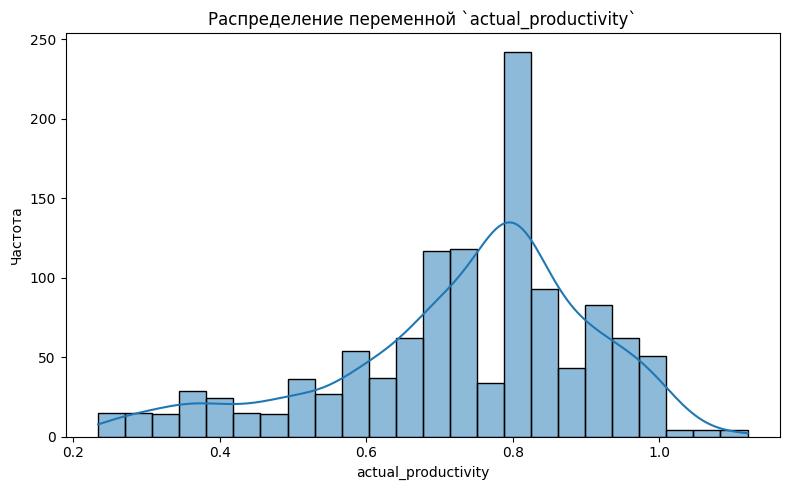

In [36]:
plt.figure(figsize=(8, 5))
sns.histplot(df['actual_productivity'].dropna(), kde=True)
plt.title(f"Распределение переменной `actual_productivity`")
plt.xlabel('actual_productivity')
plt.ylabel("Частота")
plt.tight_layout()
plt.show()

**Постройте heatmap для матрицы корреляции числовых переменных в датасете.**

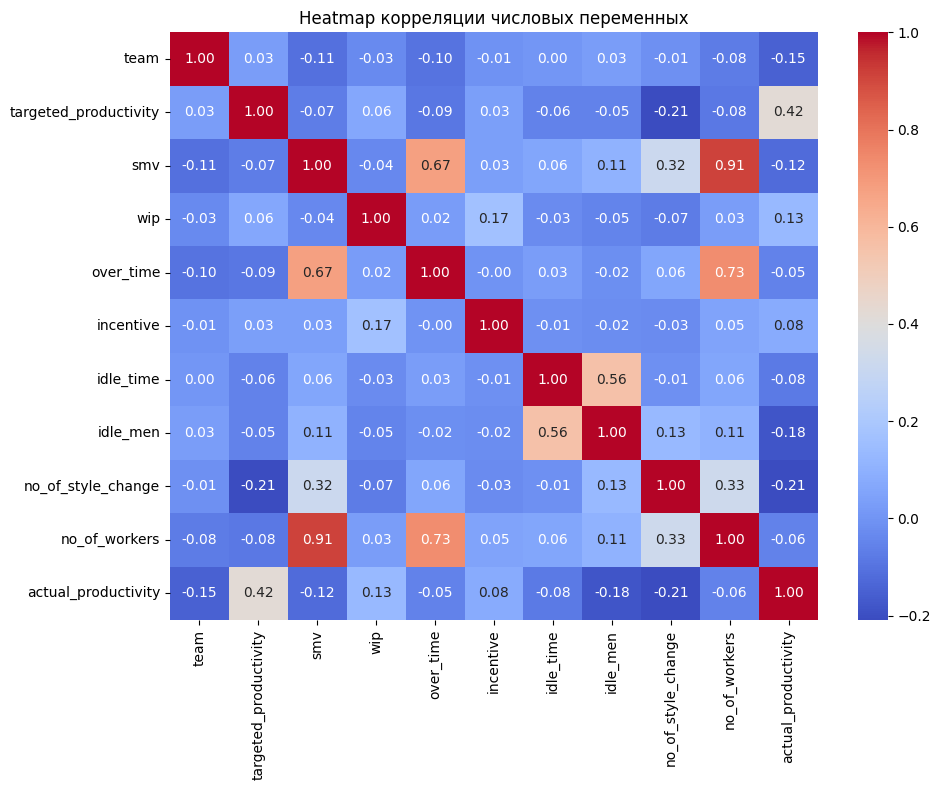

In [38]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

corr = df[numeric_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Heatmap корреляции числовых переменных")
plt.tight_layout()
plt.show()

**Постройте pairplot для всех переменных.**

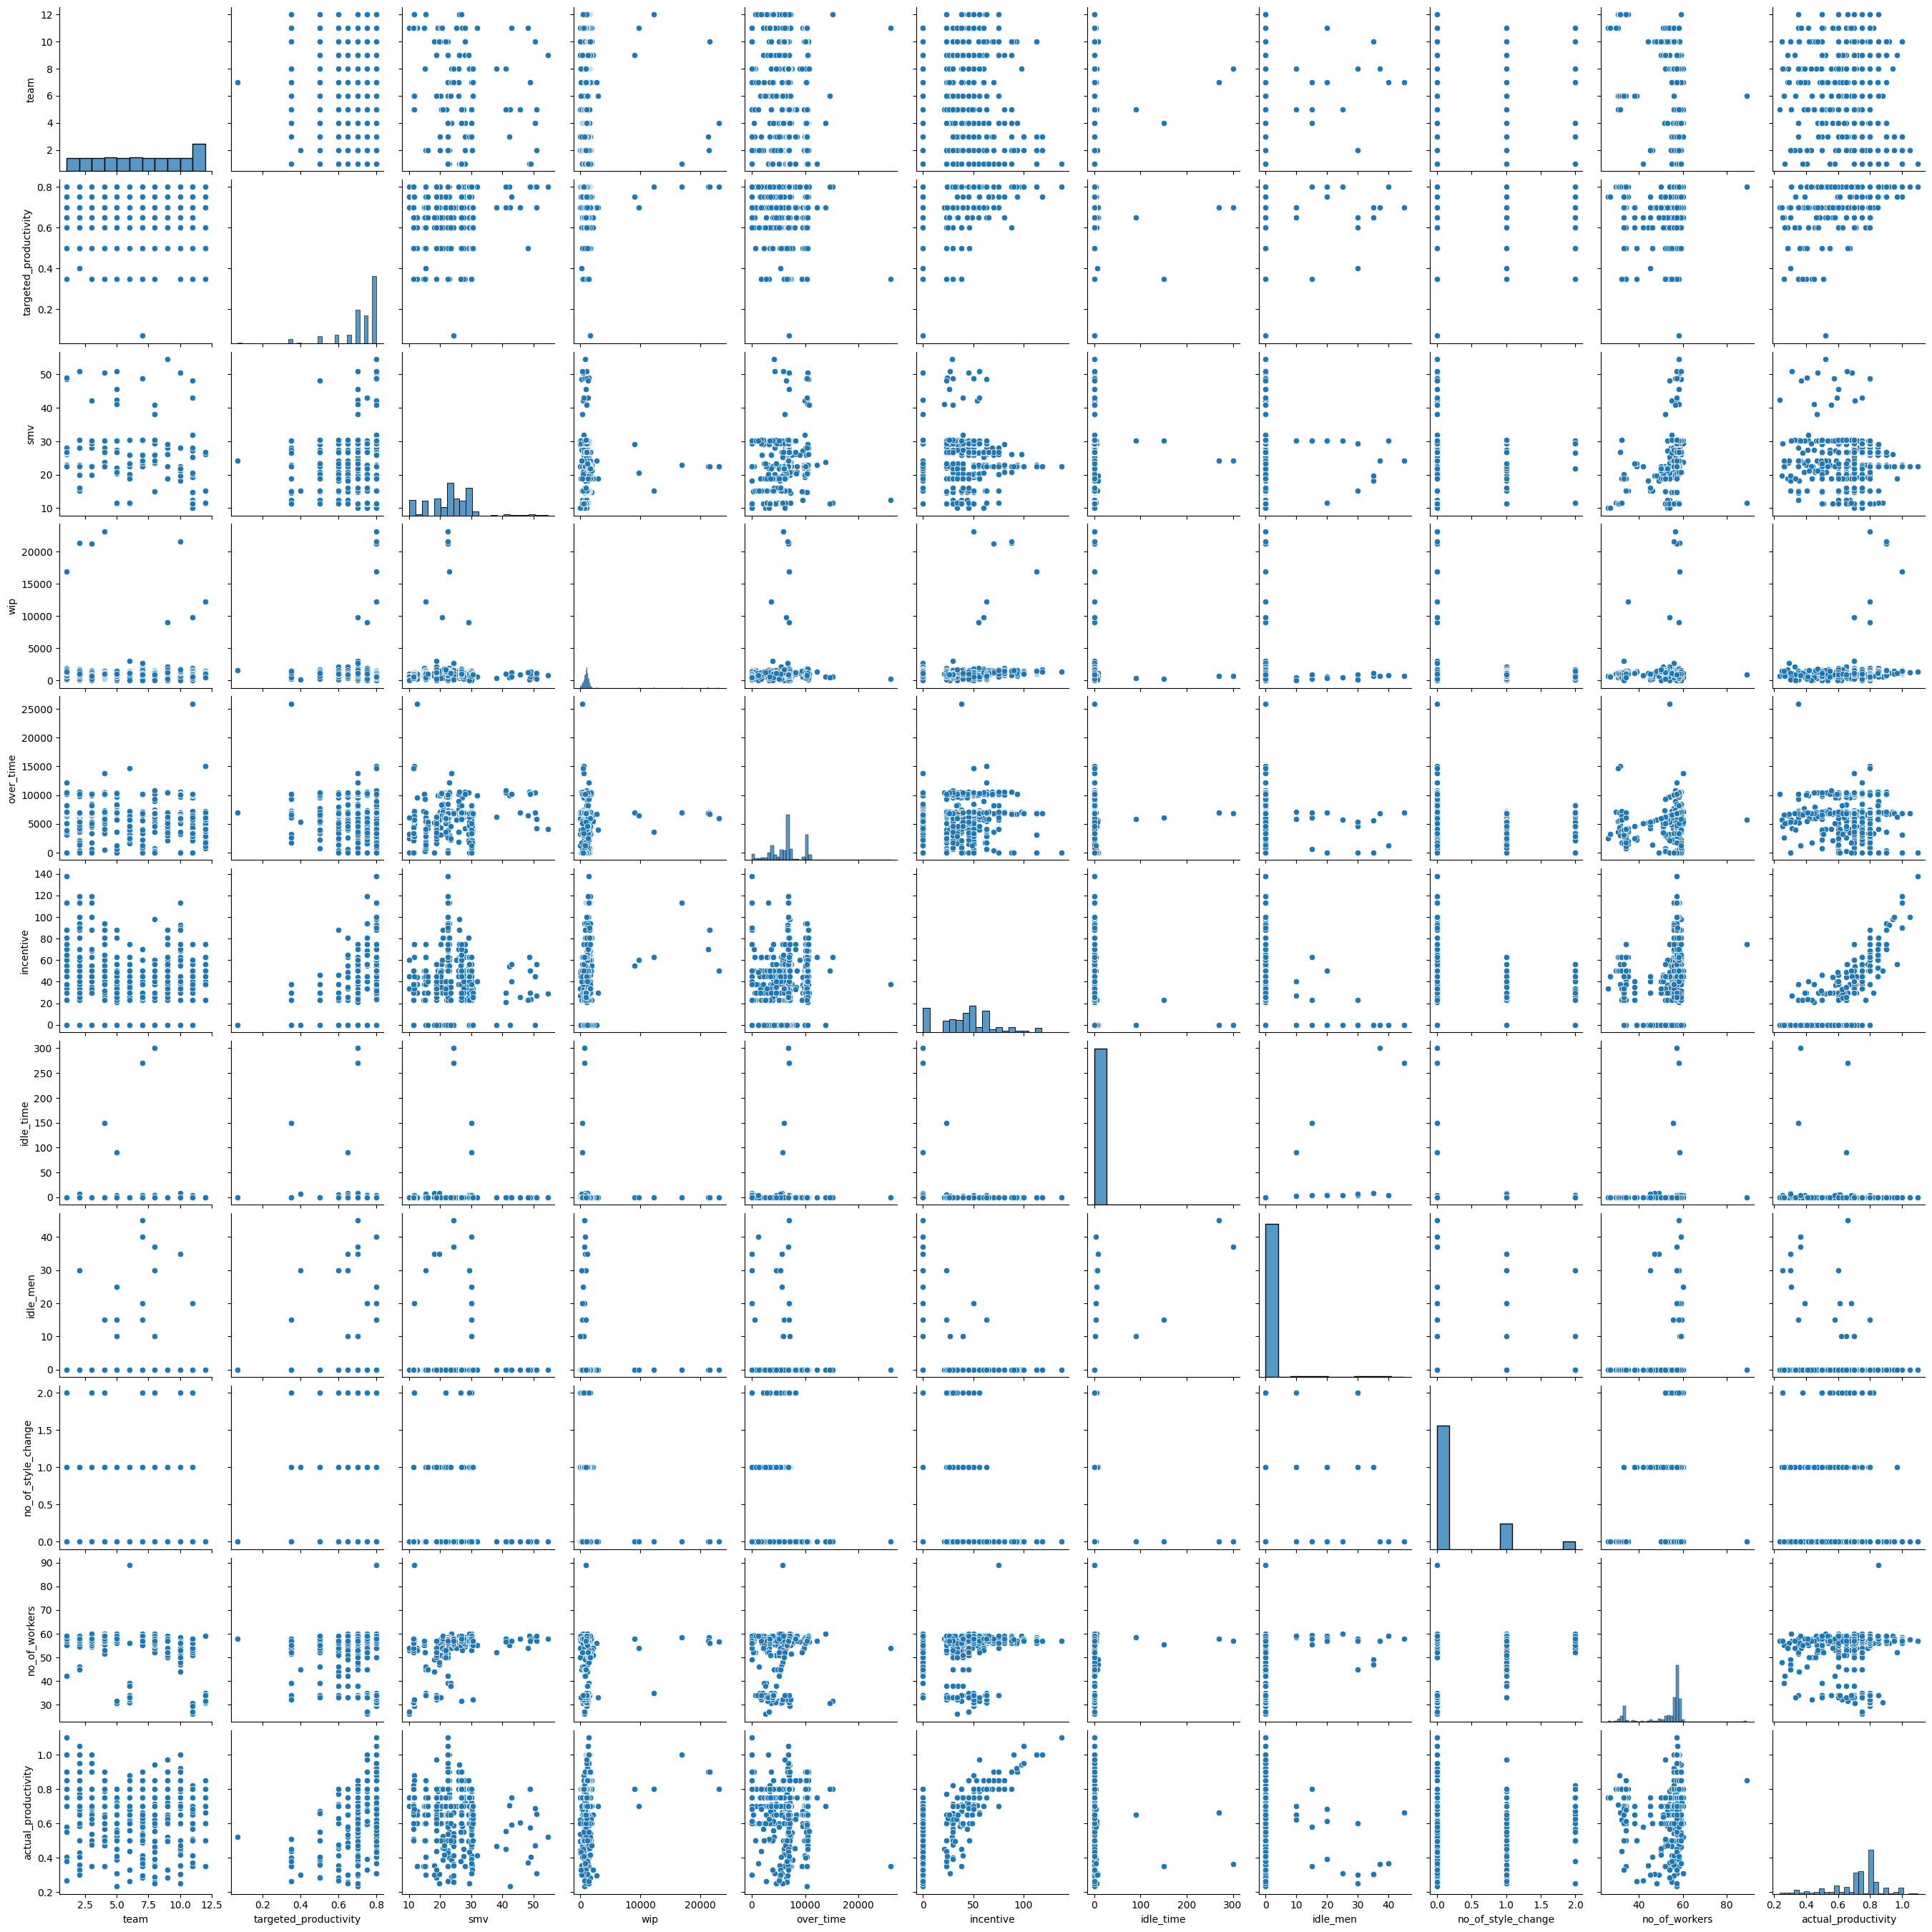

In [40]:
pp_cols = numeric_cols
sns.pairplot(df[pp_cols].dropna())
plt.show()

**Постройте boxplot для всех переменных и выведете объекты которые являются выбросами (строки из датафрейма).**

In [44]:
len(numeric_cols)

11

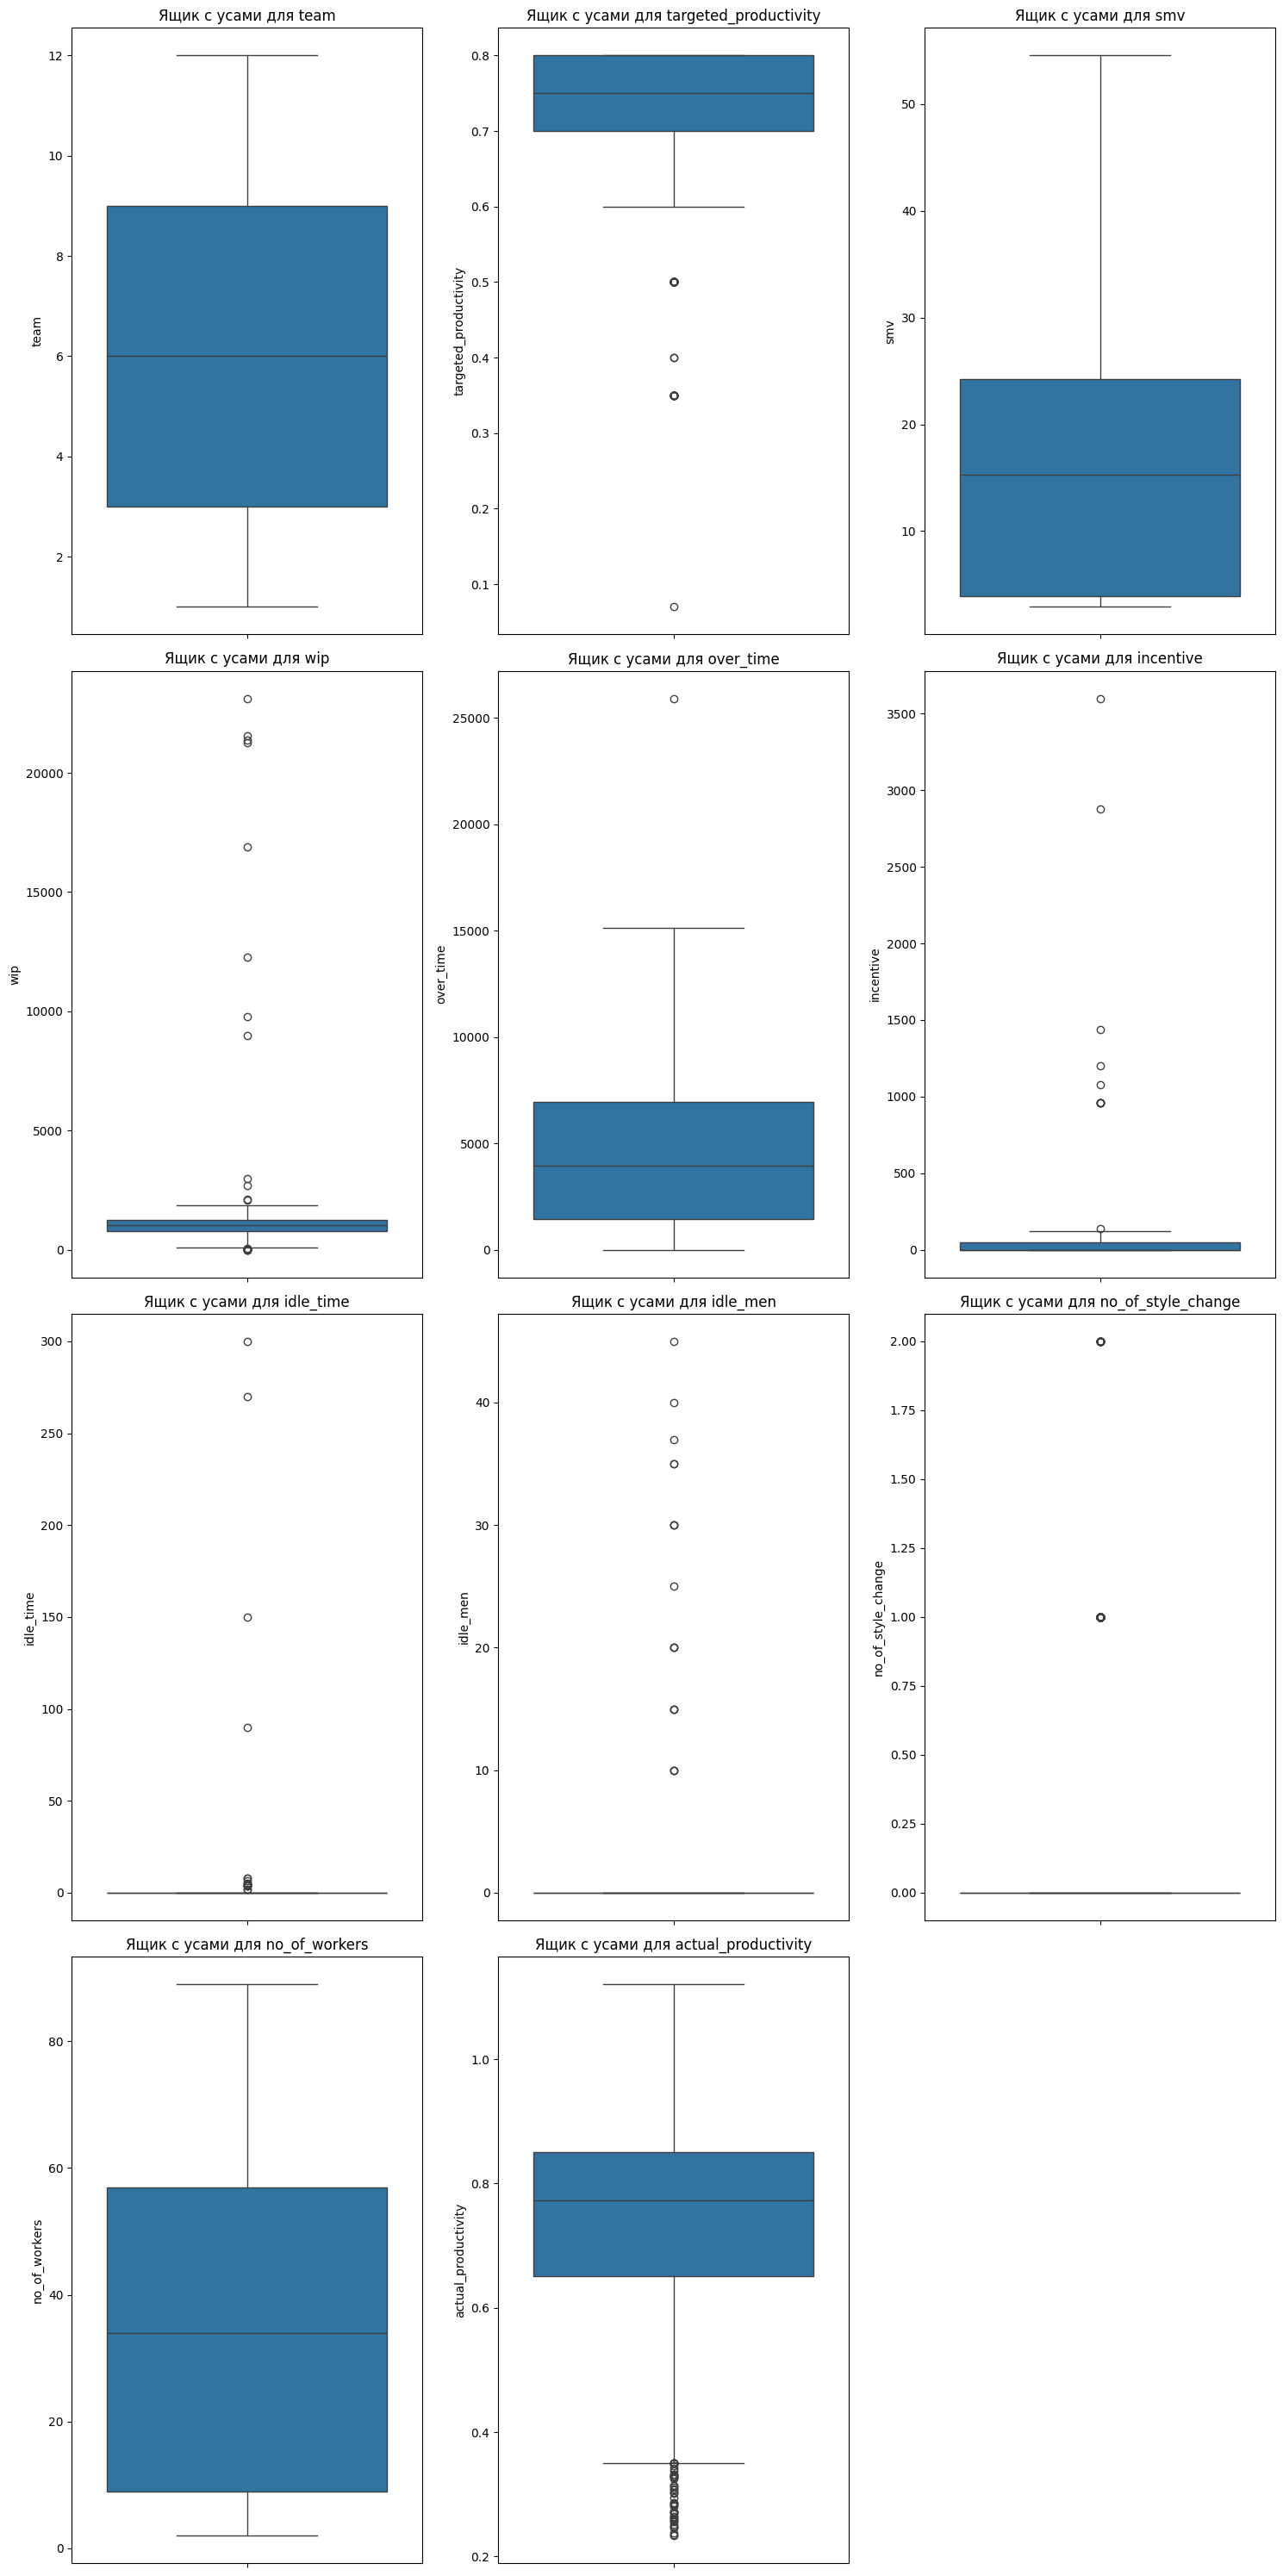

In [46]:
plt.figure(figsize=(15, 30))
for i, column in enumerate(numeric_cols, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(y=df[column].dropna())
    plt.title(f'Ящик с усами для {column}')
    plt.tight_layout()
plt.show()

In [47]:
outlier_mask = pd.DataFrame(False, index=df.index, columns=numeric_cols)
outlier_rows_mask = pd.Series(False, index=df.index)

for col in numeric_cols:
    col_series = df[col].dropna()
    Q1 = col_series.quantile(0.25)
    Q3 = col_series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    is_out = (df[col] < lower) | (df[col] > upper)
    outlier_mask[col] = is_out.fillna(False)
    outlier_rows_mask = outlier_rows_mask | outlier_mask[col]

outliers_df = df[outlier_rows_mask]

In [48]:
outliers_df

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
60,1/4/2015,Quarter1,finishing,Sunday,11,0.75,4.15,NaN,960,0,0.0,0,0,8.0,0.345833
125,1/7/2015,Quarter1,finishing,Wednesday,5,0.70,4.15,NaN,1440,0,0.0,0,0,8.0,0.330114
146,1/8/2015,Quarter2,sweing,Thursday,11,0.35,12.52,287.0,25920,38,0.0,0,0,54.0,0.349951
147,1/8/2015,Quarter2,sweing,Thursday,5,0.70,42.41,724.0,10260,0,0.0,0,0,57.0,0.233705
165,1/10/2015,Quarter2,sweing,Saturday,11,0.50,12.52,749.0,9540,38,0.0,0,0,53.0,0.673245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1185,3/11/2015,Quarter2,sweing,Wednesday,2,0.75,16.10,971.0,5400,45,0.0,0,1,45.0,0.750141
1188,3/11/2015,Quarter2,sweing,Wednesday,5,0.70,26.82,992.0,6960,30,0.0,0,1,58.0,0.700557
1189,3/11/2015,Quarter2,sweing,Wednesday,8,0.70,30.48,914.0,6840,30,0.0,0,1,57.0,0.700505
1190,3/11/2015,Quarter2,sweing,Wednesday,6,0.70,23.41,1128.0,4560,40,0.0,0,1,38.0,0.700246


In [49]:
print(f"\nНайдено строк, содержащих выбросы в хотя бы одной числовой колонке: {len(outliers_df)}")


Найдено строк, содержащих выбросы в хотя бы одной числовой колонке: 267


**Посчитайте различные статестические показатели (среднее, медиана, максимум, минимум) для различных категорий в колонке quarter (т.е. отдельно какие показатели у класса quarter1, какие у класса quarter2 и и т.д.).**

In [51]:
df['quarter'].value_counts()

,count
quarter,
Quarter1,360
Quarter2,335
Quarter4,248
Quarter3,210
Quarter5,44


In [52]:
group_col = 'quarter'
agg_funcs = ['mean', 'median', 'min', 'max', 'count']
group_stats = df.groupby(group_col)[numeric_cols].agg(agg_funcs).round(6)

In [53]:
print(f"\nСтатистические показатели по группам столбца `{group_col}`:")
group_stats


Статистические показатели по группам столбца `quarter`:


team                      targeted_productivity               \
              mean median min max count                  mean median   min   
quarter                                                                      
Quarter1  6.327778    6.0   1  12   360              0.744083   0.80  0.07   
Quarter2  6.361194    6.0   1  12   335              0.732090   0.80  0.35   
Quarter3  6.642857    7.0   1  12   210              0.721190   0.75  0.35   
Quarter4  6.475806    6.0   1  12   248              0.714516   0.75  0.35   
Quarter5  6.431818    6.0   1  12    44              0.718182   0.75  0.50   

                     ... no_of_workers                          \
          max count  ...          mean median  min   max count   
quarter              ...                                         
Quarter1  0.8   360  ...     34.843056   34.0  8.0  60.0   360   
Quarter2  0.8   335  ...     33.735821   34.0  2.0  60.0   335   
Quarter3  0.8   210  ...     36.440476   48.5  2.0  89.0   210   
Quarter4  0.8   248  ...     34.425403   34.0  4.0  60.0   248   
Quarter5  0.8    44  ...     31.659091   33.0  2.0  59.0    44   

         actual_productivity                                      
                        mean    median       min       max count  
quarter                                                           
Quarter1            0.751560  0.800045  0.260979  1.050667   360  
Quarter2            0.743710  0.800035  0.233705  1.100484   335  
Quarter3            0.704759  0.725436  0.235795  1.120438   210  
Quarter4            0.709067  0.750411  0.259375  1.059621   248  
Quarter5            0.826177  0.888276  0.286985  1.000457    44  

[5 rows x 55 columns]

**Разделите колонку date на три: день, месяц, год.**

In [56]:
print(np.dtype(df['date']))
df['date'].head()

object


,date
0,1/1/2015
1,1/1/2015
2,1/1/2015
3,1/1/2015
4,1/1/2015


In [58]:
df['date'] = pd.to_datetime(df['date'], format='%m/%d/%Y')

df['date_day'] = df['date'].dt.day
df['date_month'] = df['date'].dt.month
df['date_year'] = df['date'].dt.year

In [59]:
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,date_day,date_month,date_year
0,2015-01-01,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725,1,1,2015
1,2015-01-01,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500,1,1,2015
2,2015-01-01,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,1,1,2015
3,2015-01-01,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,1,1,2015
4,2015-01-01,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382,1,1,2015
